## Import Dataset 

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
dataset = pd.read_excel('customer_churn_large_dataset.xlsx')

In [185]:
# convert xlsx file into csv
dataset.to_csv("dataset.csv", index=False)

In [186]:
df = pd.read_csv("dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [187]:
# data (rows, columns)
df.shape

(100000, 9)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


### We don't have null data in any column and three columns (Name, Gender, and Location) are objects.
*Remove CustomerID and Name columns because it don't help us in prediction so we don't need its,*

In [189]:
df = df.drop(['CustomerID', 'Name'], axis=1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [190]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [191]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


* average monthly bill is  65 and average subscription_length_monthes is 12.49.
* 75% customer age less then 57 , 25% seniorCitizen age 57 - 70.
* 75% customer have subscription_length_months less than 19.

In [192]:
df['Gender'].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [193]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

Text(0.5, 1.02, 'Count of TARGET Variable per Category')

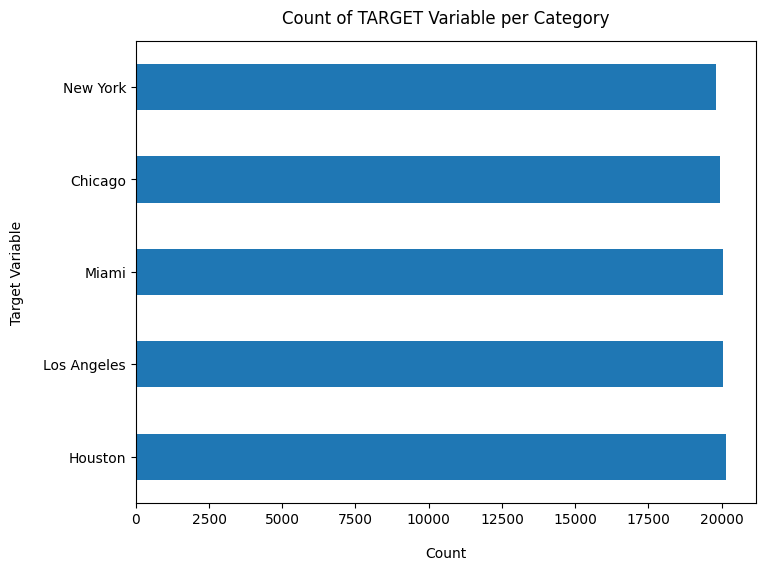

In [194]:
df['Location'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

In [195]:
df['Monthly_Bill'].value_counts()

Monthly_Bill
84.37     34
61.99     29
92.46     28
66.38     28
38.26     28
          ..
55.26      4
64.01      3
100.00     3
36.55      3
91.04      3
Name: count, Length: 7001, dtype: int64

In [196]:
df['Subscription_Length_Months'].value_counts()

Subscription_Length_Months
20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
18    4171
5     4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
19    4106
8     4106
4     4098
23    4083
17    4064
Name: count, dtype: int64

In [197]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
0    50.221
1    49.779
Name: count, dtype: float64

* Female more than male 
* Maximum Customore belong to Houstom
* allmost 50% coustomer Churn(49.779 %) 

Text(0.5, 1.02, 'Count of TARGET Variable per Category')

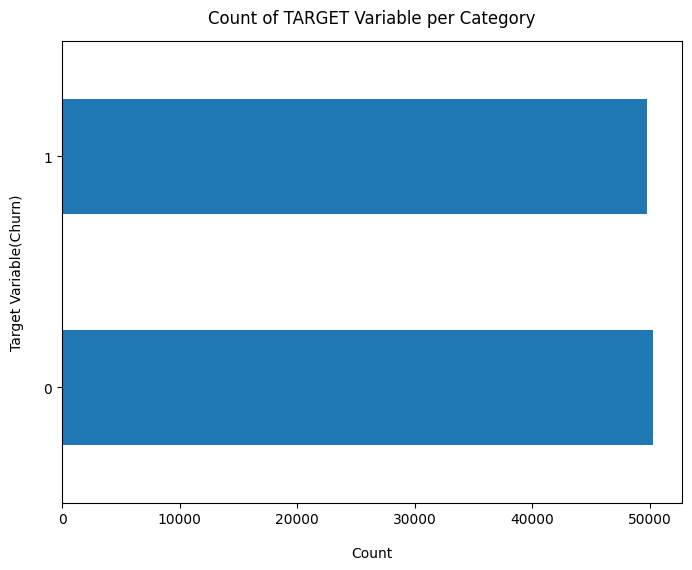

In [198]:
# visual of churn variable
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable(Churn)", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

## Data Exploration

In [199]:
# Group by Churn and calculate values of Location within each group
grouped_data = df.groupby('Location')['Churn'].value_counts()
grouped_data


Location     Churn
Chicago      0        10013
             1         9945
Houston      0        10258
             1         9899
Los Angeles  0        10161
             1         9880
Miami        1        10076
             0         9955
New York     1         9979
             0         9834
Name: count, dtype: int64

#### New York and Miami churn people more than other 

In [200]:
grouped_data = df.groupby('Gender')['Churn'].value_counts()
grouped_data

Gender  Churn
Female  0        25272
        1        24944
Male    0        24949
        1        24835
Name: count, dtype: int64

In [201]:
grouped_data = df.groupby('Total_Usage_GB')['Churn'].value_counts()
grouped_data

Total_Usage_GB  Churn
50              0        132
                1        121
51              0        106
                1        105
52              1        143
                        ... 
498             1        102
499             1        120
                0        116
500             0        139
                1        106
Name: count, Length: 902, dtype: int64

In [202]:

# Calculate the correlation matrix between column1 and column2
df.groupby('Monthly_Bill')['Churn'].value_counts()

Monthly_Bill  Churn
30.00         0        3
              1        2
30.01         1        9
              0        8
30.02         0        4
                      ..
99.98         0        6
99.99         1        5
              0        4
100.00        0        2
              1        1
Name: count, Length: 13988, dtype: int64

*Plot distibution of individual prediction by churn*

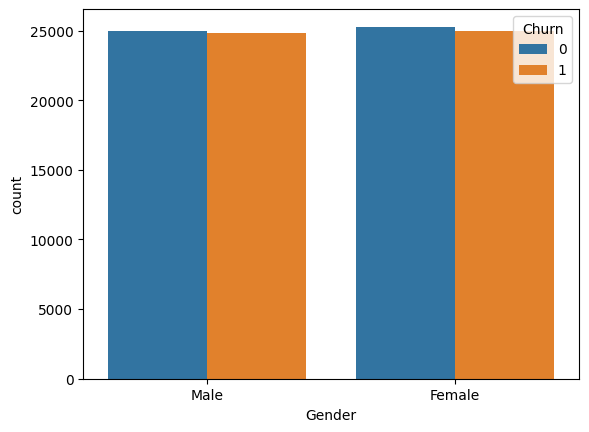

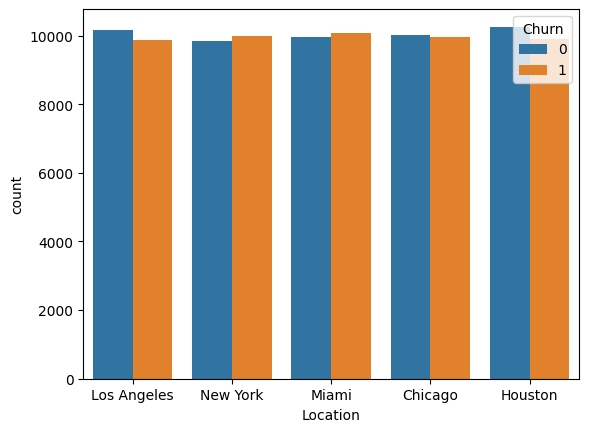

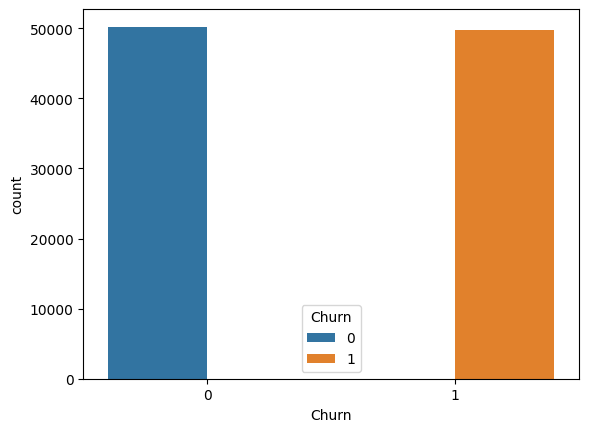

In [203]:
for i, predictor in enumerate(df.drop(columns=['Subscription_Length_Months', 'Age', 'Monthly_Bill',
       'Total_Usage_GB'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

## Encoding
*There are two columns (Male and Location) have categorical values*
### using One Hot Encoding

In [209]:
gender = df.Gender
gender = pd.get_dummies(gender, drop_first=True, dtype=int)
location = pd.get_dummies(df.Location, drop_first=True, dtype=int)
df2 = df.drop(['Gender', 'Location'], axis=1)
df2 = pd.concat([df2, gender, location], axis=1)
df2.head()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Male,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


### Split feature and label

In [210]:
# feature 
X = df2.drop('Churn', axis=1)

# label
y = df2['Churn']

In [211]:
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Male,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0


In [212]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

<Axes: >

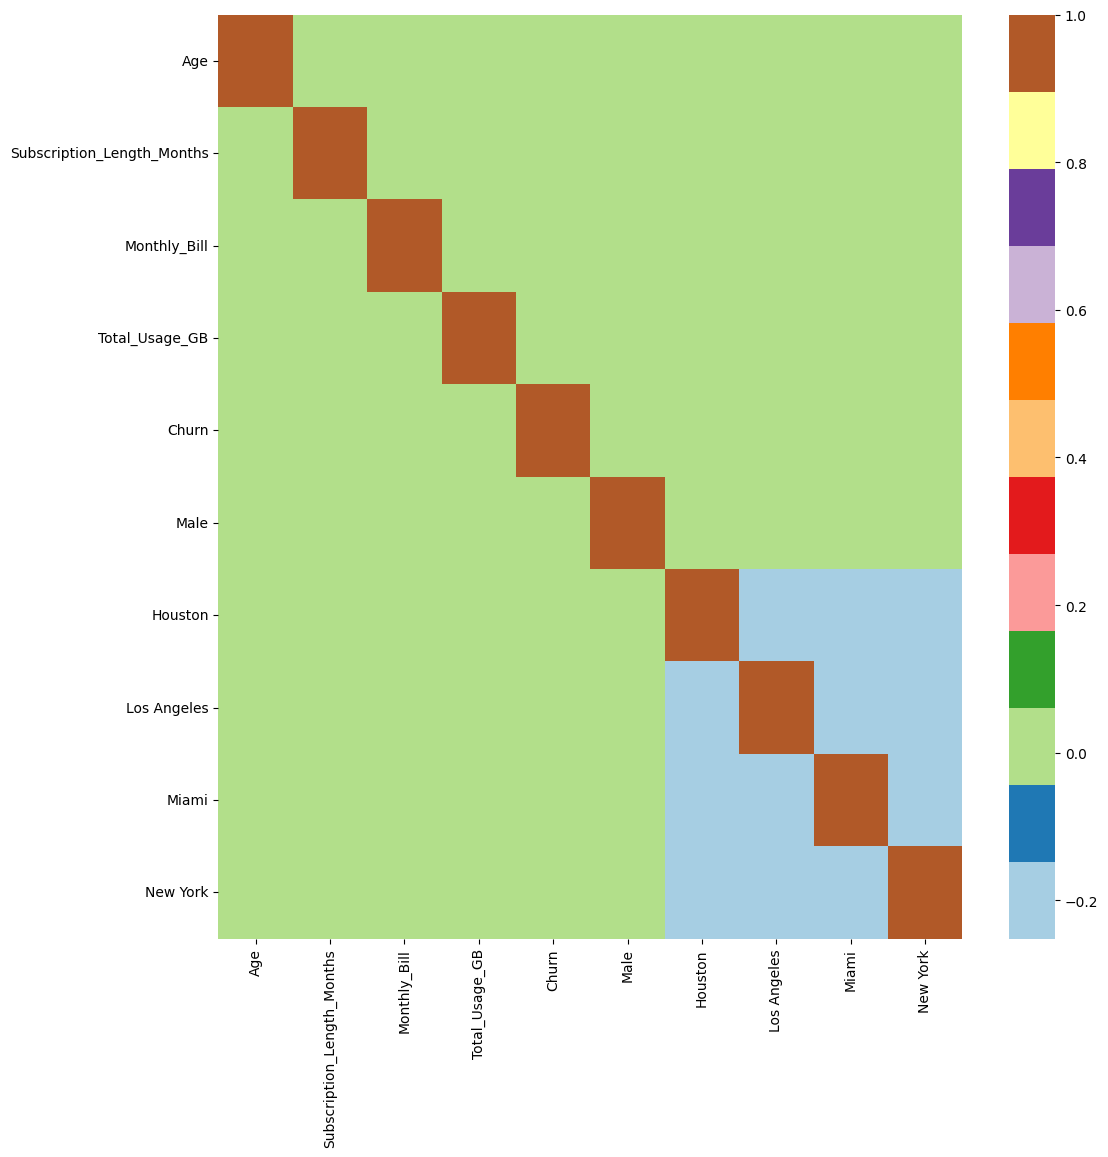

In [213]:
plt.figure(figsize=(12, 12))
sns.heatmap(df2.corr(), cmap='Paired')

## Split data into Training and Testing

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
X_train.shape

(80000, 9)

## Feature Scaling and Model Training

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [217]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on data and transform it
X_train_scaled = scaler.fit_transform(X_train)

### Create Mode

In [218]:
# Create a LogisticRegression instance and fit it on the scaled training data
model = LogisticRegression(solver='liblinear' , max_iter=10, random_state=42)
model.fit(X_train_scaled, y_train)
# model.fit(X_train, y_train)

LogisticRegression(max_iter=10, random_state=42, solver='liblinear')

In [219]:
# apply scaler to the test data
X_test_scaled = scaler.transform(X_test)

# make prediction
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

## Calculate accuracy, Confusion Matrix and Classification Report


In [220]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.5036
Confusion Matrix:
 [[6313 3766]
 [6162 3759]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



## Model 2: Decison Tree cclassifer

In [221]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5, splitter='random')
# model_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)

In [222]:
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42, splitter='random')

In [223]:
y_pred = model_dt.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [224]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[6289 3790]
 [6121 3800]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



## Model 3: Radom Forest 

In [225]:
from sklearn.ensemble import RandomForestClassifier

model_dc = RandomForestClassifier(n_estimators=100, criterion='gini' , max_depth=6, min_samples_leaf=8,
     min_samples_split=2, random_state=0)

In [226]:
model_dc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [227]:
y_pred = model_dc.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [228]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[6257 3822]
 [6135 3786]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



#### All three models return similler result (accuracy = 50). 
#### Conclusion : data is not sufficient for model training

# Choose a Model and Create Pipeline (encoding, feature engineering, model)

In [229]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [230]:
# Split data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [231]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Define preprocessing steps
numeric_features = ['Age', 'Subscription_Length_Months','Monthly_Bill', 'Total_Usage_GB', ]
categorical_features = ['Gender', 'Location']

In [233]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

In [234]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [244]:
pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [245]:
pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Subscription_Length_Months',
                                  'Monthly_Bill', 'Total_Usage_GB']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Location'])])

In [249]:
# Fit the pipeline to the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_train_scaled

array([[ 0.65344669, -1.08272837,  0.96025455, ...,  0.        ,
         0.        ,  1.        ],
       [-1.04827574,  1.66388226,  0.83962354, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.84979927, -0.07081919, -0.63217363, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.63520963, -1.51640373,  0.55188892, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71889755, -0.07081919,  1.19212316, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17917747,  0.65197308,  0.26365992, ...,  1.        ,
         0.        ,  0.        ]])

In [250]:
final_model = model.fit(X_train_scaled, y_train)
final_model

LogisticRegression(max_iter=10, random_state=42, solver='liblinear')

In [251]:
# Make predictions and evaluate
X_test_scaled = pipeline.transform(X_test)
y_pred = final_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [252]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.50365


### Save Model

In [253]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')
dump(model, 'model.joblib')


['model.joblib']